In [1]:
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('merged_data.csv')

In [3]:
df.head()

,transcript_id,transcript_position,sequence,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0


In [4]:
y = df[['label']]
X = df.drop('label', axis = 1)

In [5]:
train, test = train_test_split(df, test_size=0.2)

In [6]:
len(train)

8821684

In [7]:
len(test)

2205422

In [8]:
len(df[df['label'] == 0])

10527532

In [9]:
len(df[df['label'] == 1])

499574

In [10]:
499574/10527532

0.0474540471593912

       transcript_position  -1_flank_length  -1_flank_std  -1_flank_mean  \
count         1.025951e+06     1.025951e+06  1.025951e+06   1.025951e+06   
mean          1.333625e+03     8.207768e-03  4.482722e+00   1.134241e+02   
std           1.098740e+03     5.462591e-03  2.561871e+00   1.089248e+01   
min           3.000000e+00     1.660000e-03  2.360000e-01   7.400000e+01   
25%           6.120000e+02     4.320000e-03  2.590000e+00   1.070000e+02   
50%           1.065000e+03     6.690000e-03  3.730000e+00   1.160000e+02   
75%           1.779000e+03     1.030000e-02  5.830000e+00   1.210000e+02   
max           1.873000e+04     8.930000e-02  1.850000e+02   1.480000e+02   

       central_length   central_std  central_mean  +1_flank_length  \
count    1.025951e+06  1.025951e+06  1.025951e+06     1.025951e+06   
mean     8.216589e-03  5.178240e+00  1.131036e+02     7.188106e-03   
std      5.359488e-03  2.906516e+00  1.235028e+01     4.457209e-03   
min      1.660000e-03  2.070000e-01

<Axes: xlabel='label'>

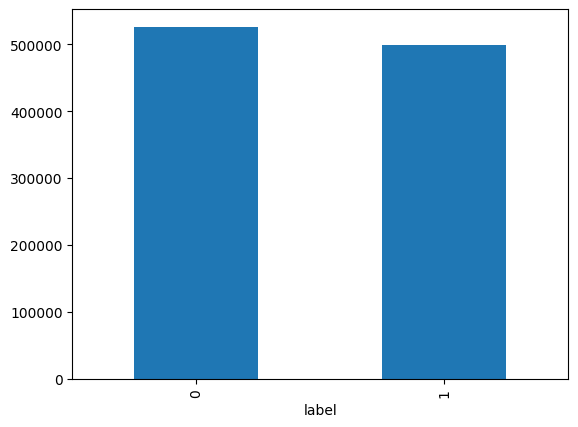

In [11]:
# Calculate the number of negative samples to remove (70% of total negatives)
num_negatives_to_remove = int(0.95 * len(df[df['label'] == 0]))

# Get the indices of negative samples
negative_indices = df.index[df['label'] == 0]

# Randomly select and remove 70% of the negative samples
indices_to_remove = np.random.choice(negative_indices, size=num_negatives_to_remove, replace=False)
df = df.drop(indices_to_remove)

# Reset the index of the DataFrame (optional)
df.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(df.describe())
df['label'].value_counts().plot(kind='bar')

In [12]:
train, test = train_test_split(df, test_size=0.05)

In [13]:
len(train)

974653

In [14]:
len(test)

51298

In [15]:
train.head()

,transcript_id,transcript_position,sequence,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label
720632,ENST00000396386,1659,GTAACCT,0.00398,2.87,90.9,0.00487,4.31,99.5,0.00689,1.78,78.0,ENSG00000122565,0
326969,ENST00000311922,1672,AGGACAG,0.01160,8.19,109.0,0.00498,6.09,105.0,0.00772,2.51,75.6,ENSG00000173334,1
564442,ENST00000367287,874,CGGACTT,0.01090,6.63,123.0,0.01790,10.30,122.0,0.00631,1.69,84.6,ENSG00000134375,1
805958,ENST00000464595,303,TGGACTG,0.00432,2.93,116.0,0.01550,9.42,120.0,0.01260,2.65,86.3,ENSG00000114391,0
819514,ENST00000479992,728,GAAACAG,0.01260,4.07,102.0,0.00896,5.12,93.5,0.00631,2.84,87.9,ENSG00000142541,1


In [17]:
train.to_csv('train_data_new.csv', index=False)
test.to_csv('test_data_new.csv', index=False)